In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy
import pandas as pd

In [3]:
import matplotlib.pyplot as pt

In [4]:
%matplotlib inline

In [5]:
GA=pd.read_csv("C:\\Users\\aedpu\\OneDrive\\Documents\\JAYAPRIYAN\\SolarPrediction.csv")

In [6]:
GA

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [7]:
GA.shape

(32686, 11)

In [8]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
newdataset=GA.drop(['UNIXTime','Data','Time','Radiation','Pressure','Humidity','WindDirection(Degrees)','TimeSunRise','TimeSunSet'],axis=1)

In [10]:
newdataset

,Temperature,Speed
0,48,5.62
1,48,3.37
2,48,3.37
3,48,3.37
4,48,5.62
...,...,...
32681,44,6.75
32682,44,6.75
32683,44,9.00
32684,44,7.87


In [11]:
x=newdataset.iloc[:,0].values.reshape(-1,1)
y=newdataset.iloc[:,1].values.reshape(-1,1)

In [12]:
x

array([[48],
       [48],
       [48],
       ...,
       [44],
       [44],
       [44]], dtype=int64)

In [13]:
y

array([[5.62],
       [3.37],
       [3.37],
       ...,
       [9.  ],
       [7.87],
       [3.37]])

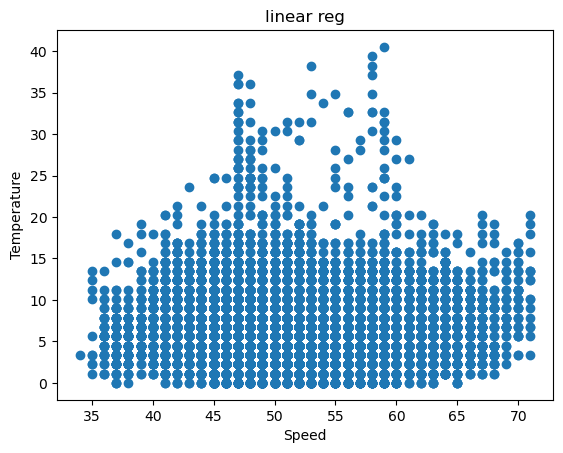

In [14]:
pt.scatter(x,y)
pt.xlabel('Speed')
pt.ylabel('Temperature')
pt.title('linear reg')
pt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [17]:
x_train.shape

(22880, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm

LinearRegression()

In [21]:
x_train

array([[45],
       [57],
       [45],
       ...,
       [60],
       [46],
       [51]], dtype=int64)

In [22]:
y_train

array([[ 0.  ],
       [11.25],
       [ 6.75],
       ...,
       [ 5.62],
       [ 4.5 ],
       [ 3.37]])

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict=lm.predict(x_test)

In [25]:
y_predict

array([[6.06310504],
       [6.28763869],
       [6.08037686],
       ...,
       [6.23582324],
       [6.30491051],
       [6.28763869]])

In [30]:
COMP=pd.DataFrame(x_test,columns=['Temperature'])

In [31]:
COMP

,Temperature
0,61
1,48
2,60
3,44
4,49
...,...
9801,63
9802,47
9803,51
9804,47


In [32]:
COMP['Speed']=y_test

In [33]:
COMP

,Temperature,Speed
0,61,5.62
1,48,16.87
2,60,15.75
3,44,7.87
4,49,9.00
...,...,...
9801,63,5.62
9802,47,7.87
9803,51,3.37
9804,47,7.87


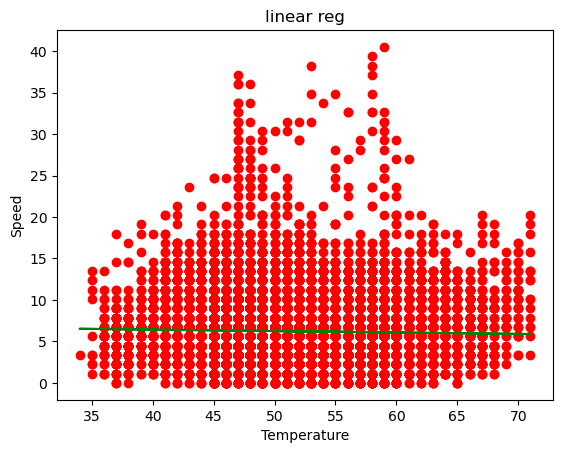

In [34]:
pt.scatter(x,y,color='red')
pt.plot(x_test,y_predict,color='green')
pt.xlabel('Temperature')
pt.ylabel('Speed')
pt.title('linear reg')
pt.show()

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mean_squared_error(y_test,y_predict)

0.005574931139058401

In [36]:
mean_absolute_error(y_test,y_predict)

0.05393717082765783